<a href="https://colab.research.google.com/github/tasinfrancesco/Practical_ML_PSL/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)
np.random.seed(42)

print("imports ok")

df = pd.read_csv("Fraud_detection.csv")
print(df.describe())
print(df.head())
df["target"].value_counts()


imports ok
                 V1            V2            V3            V4            V5  \
count  22132.000000  22132.000000  22132.000000  22132.000000  22132.000000   
mean       0.005937     -0.011961      0.020621     -0.008901      0.004778   
std        1.935244      1.698559      1.470647      1.403355      1.365894   
min      -35.557253    -60.464618    -27.747084     -5.683171    -28.815577   
25%       -0.919175     -0.602118     -0.885294     -0.862665     -0.690456   
50%        0.003859      0.055766      0.193958     -0.025238     -0.053404   
75%        1.317074      0.787888      1.045055      0.734388      0.605614   
max        2.406284     14.845545      3.894346     16.875344     31.457046   

                 V6            V7            V8            V9           V10  \
count  22132.000000  22132.000000  22131.000000  22131.000000  22131.000000   
mean      -0.002340      0.011202      0.018838      0.002533      0.012414   
std        1.313662      1.171710      1

,count
target,
0.0,21921
1.0,210


In [85]:
#define loss function

def fraud_loss(amounts, y_pred, y_true):

  if not (len(y_pred) == len(y_true) and len(y_pred) == len(amounts)):
    raise ValueError("The three arrays must be of the same length")
  y_pred = list(y_pred)
  y_true = list(y_true)
  amounts = list(amounts)
  L = len(y_pred)
  abandoned_transactions = 0
  FP = 0


  for i in range(len(y_pred)):
    if y_pred[i] == 0:
      L -= 1
      if y_true[i] == 1:
        L += amounts[i]
        FP += 1
        print(f"False positive!! Loss = {L}")

    if y_pred[i] == 1:
      abandoned_transactions += 1

  FN = abandoned_transactions - sum(y_true) + FP

  abandonment_rate = .2*abandoned_transactions/len(y_pred)
  if abandonment_rate > .1:
    L += 10000*(abandonment_rate*100-10)
    print(f"Abandonment rate above 10% by {abandonment_rate*100-10:.2f} percentage points\nNew Loss = {L}")

  return L, FP, FN


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22126    0.0
22127    0.0
22128    0.0
22129    0.0
22130    0.0
Name: target, Length: 22131, dtype: float64
(17704, 29) (4427, 29) (17704,) (4427,)
False positive!! Loss = 4398.75
False positive!! Loss = 4072.96
False positive!! Loss = 4016.28
False positive!! Loss = 4228.280000000001
False positive!! Loss = 4149.110000000001
False positive!! Loss = 3977.6600000000008
False positive!! Loss = 3597.670000000001
False positive!! Loss = 3402.670000000001
False positive!! Loss = 3378.620000000001
False positive!! Loss = 5247.560000000001
False positive!! Loss = 5217.890000000001
False positive!! Loss = 5629.040000000001
False positive!! Loss = 5591.040000000001
False positive!! Loss = 6313.840000000001
False positive!! Loss = 6247.390000000001
False positive!! Loss = 6175.240000000002
False positive!! Loss = 6455.290000000002
False positive!! Loss = 6862.290000000002
False positive!! Loss = 6540.500000000002
Fals

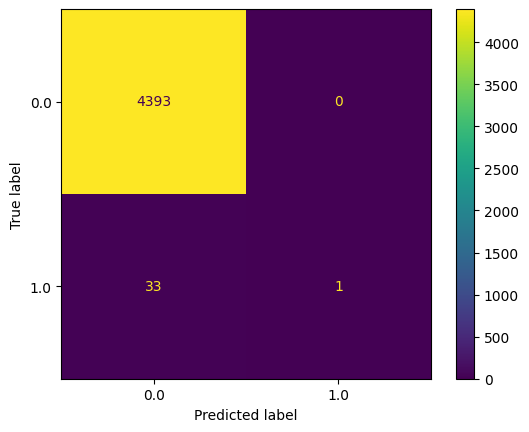

In [86]:
#naive logistic regression approach (no stratified splitting)

clean_df = df[df.notna().all(axis = 1)]

y = clean_df["target"]
X = clean_df.drop("target", axis = 1)

print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

naive_pipe = Pipeline(
    [("scaler", StandardScaler()),
     ("logistic regression", LogisticRegression())])

naive_pipe.fit(X_train, y_train)
y_pred = naive_pipe.predict(X_test)
print(fraud_loss(X_test["Amount"], y_pred, y_test))

ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_pred)
plt.show()